# Battle of Neighborhoods in Toronto

## Part 1: Creating a dataframe containing neighborhoods of the city of Toronto and their coordinates

Installing / Importing the necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests

In [13]:
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geographiclib-1.49   | 32 KB     | ##################################### | 100% 
geopy-1.20.0         | 57 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [12]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [4]:
# The code was removed by Watson Studio for sharing.

_id   AREA_ID  AREA_ATTR_ID  PARENT_AREA_ID  AREA_SHORT_CODE  \
0  981  25886861      25926662           49885               94   
1  982  25886820      25926663           49885              100   
2  983  25886834      25926664           49885               97   
3  984  25886593      25926665           49885               27   
4  985  25886688      25926666           49885               31   

   AREA_LONG_CODE                     AREA_NAME                     AREA_DESC  \
0              94                 Wychwood (94)                 Wychwood (94)   
1             100          Yonge-Eglinton (100)          Yonge-Eglinton (100)   
2              97           Yonge-St.Clair (97)           Yonge-St.Clair (97)   
3              27  York University Heights (27)  York University Heights (27)   
4              31       Yorkdale-Glen Park (31)       Yorkdale-Glen Park (31)   

    X   Y  LONGITUDE   LATITUDE  OBJECTID   Shape__Area  Shape__Length  \
0 NaN NaN -79.425515  43.676919  16491505  3.217960e+06    7515.779658   
1 NaN NaN -79.403590  43.704689  16491521  3.160334e+06    7872.021074   
2 NaN NaN -79.397871  43.687859  16491537  2.222464e+06    8130.411276   
3 NaN NaN -79.488883  43.765736  16491553  2.541821e+07   25632.335242   
4 NaN NaN -79.457108  43.714672  16491569  1.156669e+07   13953.408098   

                                            geometry  
0  {u'type': u'Polygon', u'coordinates': (((-79.4...  
1  {u'type': u'Polygon', u'coordinates': (((-79.4...  
2  {u'type': u'Polygon', u'coordinates': (((-79.3...  
3  {u'type': u'Polygon', u'coordinates': (((-79.5...  
4  {u'type': u'Polygon', u'coordinates': (((-79.4...

In [5]:
"""body2 = client_5aec89614c924d8ca34a71a2f6027ab8.get_object(Bucket='capstoneproject-donotdelete-pr-lsw2wjd8voye5q',Key='Neighbourhoods.json')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body2, "__iter__"): body2.__iter__ = types.MethodType( __iter__, body2 )"""

'body2 = client_5aec89614c924d8ca34a71a2f6027ab8.get_object(Bucket=\'capstoneproject-donotdelete-pr-lsw2wjd8voye5q\',Key=\'Neighbourhoods.json\')[\'Body\']\n# add missing __iter__ method, so pandas accepts body as file-like object\nif not hasattr(body2, "__iter__"): body2.__iter__ = types.MethodType( __iter__, body2 )'

In [6]:
#data= json.load(body2)

In [7]:
#data

In [8]:
# We keep only the name, latitude and longitude of neighborhoods
neigh_coord= coord[['AREA_NAME', 'LATITUDE', 'LONGITUDE']]
neigh_coord.columns=['Neighborhood', 'Latitude', 'Longitude'] 
neigh_coord.head()

Neighborhood   Latitude  Longitude
0                 Wychwood (94)  43.676919 -79.425515
1          Yonge-Eglinton (100)  43.704689 -79.403590
2           Yonge-St.Clair (97)  43.687859 -79.397871
3  York University Heights (27)  43.765736 -79.488883
4       Yorkdale-Glen Park (31)  43.714672 -79.457108

In [9]:
neigh_coord.shape

(140, 3)

### Get the latitude and longitude values of Toronto

Importing the latitude and longitude from csv file

In [10]:
from geopy.geocoders import Nominatim

address= "Toronto, ON"

geolocator= Nominatim (user_agent= "toronto_explorer")
location= geolocator.geocode(address)
latitude= location.latitude
longitude= location.longitude

print("The coordinate of Toronto are: {}, {}".format(latitude, longitude))

The coordinate of Toronto are: 43.653963, -79.387207


### Let's visualize the neighborhoods of these boroughs:

In [14]:
import folium

map = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, label in zip(neigh_coord['Latitude'], neigh_coord['Longitude'], neigh_coord['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

## Part2: Use the Foursquare API to explore and cluster the neighborhoods

Foursquare credentials (hidden cell)

In [15]:
# The code was removed by Watson Studio for sharing.

In [38]:
VERSION= '20180605'
LIMIT= 100

Create a function to get the venues of the neighborhoods in Toronto

In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue ID']
    
    return(nearby_venues)

### We use the created function to get venue names, coordinates, category and ID:

In [43]:
toronto_venues= getNearbyVenues(names= neigh_coord['Neighborhood'], latitudes= neigh_coord['Latitude'], longitudes= neigh_coord['Longitude'], radius= 500)

KeyboardInterrupt: 

In [45]:
toronto_venues.shape

(2139, 8)

In [46]:
toronto_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Wychwood (94)              43.676919              -79.425515   
1         Wychwood (94)              43.676919              -79.425515   
2         Wychwood (94)              43.676919              -79.425515   
3         Wychwood (94)              43.676919              -79.425515   
4  Yonge-Eglinton (100)              43.704689              -79.403590   

                                     Venue  Venue Latitude  Venue Longitude  \
0           Wychwood Barns Farmers' Market       43.680010       -79.423849   
1                           Wychwood Barns       43.680028       -79.423810   
2                           Hillcrest Park       43.676012       -79.424787   
3                           Bob Coffee Bar       43.675376       -79.423268   
4  North Toronto Memorial Community Centre       43.706098       -79.404337   

   Venue Category                  Venue ID  
0  Farmers Market  4b86e89df964a52051a531e3  
1     Event Space  4afc6ed3f964a520a82222e3  
2            Park  4aedbe8df964a52080ce21e3  
3     Coffee Shop  58ab4dbc3ef0f67e2fc14df4  
4             Gym  4b4bc217f964a520a8a626e3

### Restrain the dataset to restaurants

In [47]:
resto_venues= toronto_venues[toronto_venues['Venue Category'].str.contains('Restaurant')]
resto_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
9   Yonge-Eglinton (100)              43.704689               -79.40359   
12  Yonge-Eglinton (100)              43.704689               -79.40359   
18  Yonge-Eglinton (100)              43.704689               -79.40359   
20  Yonge-Eglinton (100)              43.704689               -79.40359   
28  Yonge-Eglinton (100)              43.704689               -79.40359   

                  Venue  Venue Latitude  Venue Longitude  \
9        Sake Bar Kushi       43.704923       -79.406954   
12  Ritz Caribbean Food       43.706486       -79.399763   
18               Darbar       43.704863       -79.407746   
20           A&W Canada       43.704555       -79.407625   
28      Zucca Trattoria       43.703777       -79.397824   

          Venue Category                  Venue ID  
9    Japanese Restaurant  51ce2935498e66d5290f45c9  
12  Caribbean Restaurant  517adc9be4b053371ec02d9e  
18    Persian Restaurant  50c3aca0e4b08c3b596b19d7  
20  Fast Food Restaurant  4c57591fa7d976b02bbadcee  
28    Italian Restaurant  4ad4c05ff964a52035f720e3

In [48]:
resto_venues.shape

(507, 8)

In [49]:
# Get the number of venues per neighborhood
resto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                      
Agincourt North (129)                                         5   
Agincourt South-Malvern West (128)                           14   
Annex (95)                                                    4   
Banbury-Don Mills (42)                                        2   
Bay Street Corridor (76)                                     26   
Bedford Park-Nortown (39)                                     9   
Beechborough-Greenbrook (112)                                 2   
Bendale (127)                                                 1   
Blake-Jones (69)                                              2   
Briar Hill-Belgravia (108)                                    1   
Bridle Path-Sunnybrook-York Mills (41)                        1   
Cabbagetown-South St.James Town (71)                          9   
Caledonia-Fairbank (109)                                      1   
Casa Loma (96)                                                1   
Church-Yonge Corridor (75)                                   24   
Cliffcrest (123)                                              2   
Corso Italia-Davenport (92)                                  12   
Danforth (66)                                                 8   
Danforth East York (59)                                       1   
Don Valley Village (47)                                       3   
Dorset Park (126)                                             3   
Dovercourt-Wallace Emerson-Junction (93)                      1   
Dufferin Grove (83)                                          13   
East End-Danforth (62)                                        4   
Edenbridge-Humber Valley (9)                                  1   
Eglinton East (138)                                           1   
Elms-Old Rexdale (5)                                          2   
Eringate-Centennial-West Deane (11)                           1   
Flemingdon Park (44)                                          7   
Forest Hill North (102)                                       5   
...                                                         ...   
Oakwood Village (107)                                         3   
Old East York (58)                                            3   
Palmerston-Little Italy (80)                                  5   
Playter Estates-Danforth (67)                                17   
Pleasant View (46)                                            3   
Regent Park (72)                                              7   
Rockcliffe-Smythe (111)                                       1   
Roncesvalles (86)                                             7   
Rouge (131)                                                   2   
Runnymede-Bloor West Village (89)                             6   
Scarborough Village (139)                                     1   
South Parkdale (85)                                          12   
Steeles (116)                                                 7   
Tam O'Shanter-Sullivan (118)                                  4   
The Beaches (63)                                              7   
Thistletown-Beaumond Heights (3)                              9   
Thorncliffe Park (55)                                         2   
Trinity-Bellwoods (81)                                        7   
University (79)                                               8   
Victoria Village (43)                                         2   
West Humber-Clairville (1)                                    3   
Weston-Pellam Park (91)                                       5   
Wexford/Maryvale (119)                                        4   
Woburn (137)                                                  2   
Woodbine Corridor (64)                                        1   
Woodbine-Lumsden (60)                                         2   
Yonge-Eglinton (100)                                          7   
Yonge-St.Clair (97)   

Number of unique venues category:

In [50]:
# Number of restaurants:
resto_venues['Venue Category'].unique().shape[0]

55

In [51]:
# Number of restaurants per neighborhood (top 10):
resto_venues[['Neighborhood', 'Venue']].groupby('Neighborhood').count().sort_values(by='Venue', ascending= False).head(10)

Venue
Neighborhood                             
Kensington-Chinatown (78)              34
Bay Street Corridor (76)               26
Mount Pleasant West (104)              26
Church-Yonge Corridor (75)             24
Yonge-St.Clair (97)                    18
Playter Estates-Danforth (67)          17
Greenwood-Coxwell (65)                 16
Agincourt South-Malvern West (128)     14
Dufferin Grove (83)                    13
Lawrence Park North (105)              13

In [52]:
# Number of restaurants per category (top 10):
resto_venues[['Venue Category', 'Venue']].groupby('Venue Category').count().sort_values(by= 'Venue', ascending= False).head(10)

Venue
Venue Category                  
Italian Restaurant            53
Restaurant                    44
Fast Food Restaurant          44
Indian Restaurant             33
Chinese Restaurant            32
Japanese Restaurant           27
Thai Restaurant               26
Sushi Restaurant              25
Vietnamese Restaurant         21
Middle Eastern Restaurant     16

### We restrain the restaurants categories to only 10 categories as follow:

In [53]:
resto_venues.loc[resto_venues['Venue Category'].isin(['African Restaurant', 'Ethiopian Restaurant']), 'New Category']='African Restaurant'
resto_venues.loc[resto_venues['Venue Category'].isin(['American Restaurant', 'New American Restaurant']), 'New Category']='American Restaurant'
resto_venues.loc[resto_venues['Venue Category'].isin(['Argentinian Restaurant', 'Brazilian Restaurant', 'Latin American Restaurant', 'Mexican Restaurant', 'South American Restaurant', 'Caribbean Restaurant', 'Cuban Restaurant']), 'New Category']='South American Restaurant'
resto_venues.loc[resto_venues['Venue Category'].isin(['Asian Restaurant', 'Cantonese Restaurant', 'Chinese Restaurant', 'Dumpling Restaurant', 'Filipino Restaurant', 'Indonesian Restaurant', 'Korean Restaurant', 'Pakistani Restaurant', 'Persian Restaurant', 'Taiwanese Restaurant', 'Thai Restaurant', 'Vietnamese Restaurant', 'Malay Restaurant']), 'New Category']='Asian Restaurant'
resto_venues.loc[resto_venues['Venue Category'].isin(['Belgian Restaurant', 'Eastern European Restaurant', 'European Restaurant', 'French Restaurant', 'German Restaurant', 'Greek Restaurant', 'Modern European Restaurant', 'Portuguese Restaurant', 'Swiss Restaurant', 'Tapas Restaurant']), 'New Category']='European Restaurant'
resto_venues.loc[resto_venues['Venue Category'].isin(['Egyptian Restaurant', 'Falafel Restaurant', 'Israeli Restaurant', 'Middle Eastern Restaurant', 'Turkish Restaurant']), 'New Category']='Middle Eastern Restaurant'
resto_venues.loc[resto_venues['Venue Category']=='Italian Restaurant', 'New Category']= 'Italian Restaurant'
resto_venues.loc[resto_venues['Venue Category'].isin(['Japanese Restaurant', 'Sushi Restaurant', 'Ramen Restaurant']), 'New Category']='Japanese Restaurant'
resto_venues.loc[resto_venues['Venue Category'].isin(['Indian Restaurant', 'North Indian Restaurant']), 'New Category']='Indian Restaurant'
resto_venues.loc[resto_venues['Venue Category'].isin(['Tibetan Restaurant', 'Chinese Restaurant', 'Xinjiang Restaurant', 'Hakka Restaurant', 'Dim Sum Restaurant', 'Hotpot Restaurant']), 'New Category']='Chinese Restaurant'

In [54]:
resto_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
9   Yonge-Eglinton (100)              43.704689               -79.40359   
12  Yonge-Eglinton (100)              43.704689               -79.40359   
18  Yonge-Eglinton (100)              43.704689               -79.40359   
20  Yonge-Eglinton (100)              43.704689               -79.40359   
28  Yonge-Eglinton (100)              43.704689               -79.40359   

                  Venue  Venue Latitude  Venue Longitude  \
9        Sake Bar Kushi       43.704923       -79.406954   
12  Ritz Caribbean Food       43.706486       -79.399763   
18               Darbar       43.704863       -79.407746   
20           A&W Canada       43.704555       -79.407625   
28      Zucca Trattoria       43.703777       -79.397824   

          Venue Category                  Venue ID               New Category  
9    Japanese Restaurant  51ce2935498e66d5290f45c9        Japanese Restaurant  
12  Caribbean Restaurant  517adc9be4b053371ec02d9e  South American Restaurant  
18    Persian Restaurant  50c3aca0e4b08c3b596b19d7           Asian Restaurant  
20  Fast Food Restaurant  4c57591fa7d976b02bbadcee                        NaN  
28    Italian Restaurant  4ad4c05ff964a52035f720e3         Italian Restaurant

### We drop the remaining venues, which are not representative

In [55]:
resto_venues[resto_venues['New Category'].isnull()== True]

Neighborhood  Neighborhood Latitude  \
20               Yonge-Eglinton (100)              43.704689   
29               Yonge-Eglinton (100)              43.704689   
31               Yonge-Eglinton (100)              43.704689   
46                Yonge-St.Clair (97)              43.687859   
51                Yonge-St.Clair (97)              43.687859   
99       York University Heights (27)              43.765736   
102           Yorkdale-Glen Park (31)              43.714672   
103           Yorkdale-Glen Park (31)              43.714672   
108           Yorkdale-Glen Park (31)              43.714672   
111           Yorkdale-Glen Park (31)              43.714672   
115           Yorkdale-Glen Park (31)              43.714672   
119           Yorkdale-Glen Park (31)              43.714672   
166         Lawrence Park North (105)              43.730060   
172         Lawrence Park North (105)              43.730060   
173         Lawrence Park North (105)              43.730060   
212              Little Portugal (84)              43.647536   
219              Little Portugal (84)              43.647536   
225              Little Portugal (84)              43.647536   
262                  Long Branch (19)              43.592362   
267                     Malvern (132)              43.803658   
269                     Malvern (132)              43.803658   
277                Markland Wood (12)              43.633542   
296                 Morningside (135)              43.782399   
338                Mount Dennis (115)              43.688144   
349          Mount Pleasant East (99)              43.704852   
361          Mount Pleasant East (99)              43.704852   
377         Mount Pleasant West (104)              43.704435   
383         Mount Pleasant West (104)              43.704435   
392         Mount Pleasant West (104)              43.704435   
401         Mount Pleasant West (104)              43.704435   
...                               ...                    ...   
1543       Church-Yonge Corridor (75)              43.659649   
1586                 Cliffcrest (123)              43.721121   
1588                 Cliffcrest (123)              43.721121   
1606      Corso Italia-Davenport (92)              43.677661   
1655          Don Valley Village (47)              43.783294   
1659          Don Valley Village (47)              43.783294   
1664                Dorset Park (126)              43.759274   
1709              Dufferin Grove (83)              43.655428   
1710              Dufferin Grove (83)              43.655428   
1716              Dufferin Grove (83)              43.655428   
1725              Dufferin Grove (83)              43.655428   
1765     Edenbridge-Humber Valley (9)              43.670886   
1803             Flemingdon Park (44)              43.715930   
1832          Forest Hill North (102)              43.704218   
1854           Greenwood-Coxwell (65)              43.672612   
1877           Greenwood-Coxwell (65)              43.672612   
1879           Greenwood-Coxwell (65)              43.672612   
1881           Greenwood-Coxwell (65)              43.672612   
1940  Islington-City Centre West (14)              43.633463   
1945  Islington-City Centre West (14)              43.633463   
1946  Islington-City Centre West (14)              43.633463   
1947  Islington-City Centre West (14)              43.633463   
2061        Kensington-Chinatown (78)              43.653554   
2064        Kensington-Chinatown (78)              43.653554   
2074        Kensington-Chinatown (78)              43.653554   
2076        Kensington-Chinatown (78)              43.653554   
2079        Kensington-Chinatown (78)              43.653554   
2082        Kensington-Chinatown (78)              43.653554   
2114        Kensington-Chinatown (78)              43.653554   
2115        Kensington-Chinatown (78)              43.653554   

      Neighborhood Longitude                            

In [56]:
# number of restaurants that will be dropped:
dropped= resto_venues[resto_venues['New Category'].isnull()== True]
dropped['Venue Category'].shape[0]

118

In [57]:
resto_venues.dropna(subset=['New Category'], axis=0, inplace= True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [58]:
resto_venues.reset_index(inplace= True)

### Number of restaurants per new categories:

In [59]:
resto_venues['New Category'].value_counts()

Asian Restaurant             82
Japanese Restaurant          60
Italian Restaurant           53
Chinese Restaurant           40
European Restaurant          38
Indian Restaurant            34
South American Restaurant    33
Middle Eastern Restaurant    27
American Restaurant          17
African Restaurant            5
Name: New Category, dtype: int64

In [60]:
# Total number of remaining restaurants:
resto_venues.shape[0]

389

Let's create bar plot to explicit the importance of each category in terms of number of restaurants:

In [61]:
v_cat= resto_venues[['New Category', 'Venue']].groupby('New Category').count().sort_values(by= 'Venue', ascending= False)

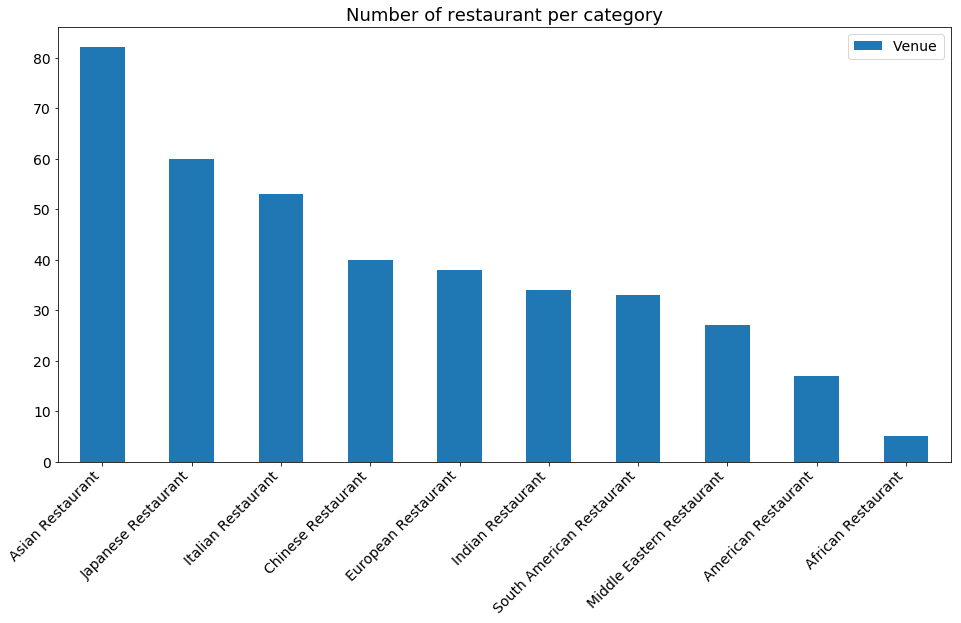

In [142]:
v_cat.plot(kind= 'bar', figsize= (16, 8))

plt.title('Number of restaurant per category', fontsize= 18)
plt.xlabel('')
plt.xticks(rotation= 45, ha='right', fontsize= 14, )
plt.yticks(fontsize= 14)
plt.legend(fontsize= 14)

plt.show()

### We use Foursquare API to get the restaurant's ratings:

In [66]:
rating_list=[]
for id in resto_venues['Venue ID']:    
   # create the API request URL
    url2 = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}&like'.format(id, CLIENT_ID, 
                CLIENT_SECRET, VERSION)
    results= requests.get(url2).json()['response']
    # manage the case of restaurants without rating: 
    if 'rating' in results['venue'].keys():
        rating_list.append(results['venue']['rating'])
    else:
        rating_list.append(0) # we put a zero if the rating is missing


rating_list[0:10] # list containing the ratings

[7.6, 7.4, 7.0, 6.2, 8.4, 7.7, 7.3, 8.2, 7.2, 7.2]

In [67]:
# we check that list containing the ratings has the same length as our dataset:
len(rating_list)

389

In [68]:
# add the rating to the dataset:
resto_venues['Rating']= rating_list

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [69]:
# we keep only restaurants having a rating equal or superior to 7:
resto_venues= resto_venues[resto_venues['Rating']>=7]

In [70]:
print(resto_venues.shape)
resto_venues.head()

(232, 11)


index          Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      9  Yonge-Eglinton (100)              43.704689              -79.403590   
1     12  Yonge-Eglinton (100)              43.704689              -79.403590   
2     18  Yonge-Eglinton (100)              43.704689              -79.403590   
4     41   Yonge-St.Clair (97)              43.687859              -79.397871   
5     44   Yonge-St.Clair (97)              43.687859              -79.397871   

                 Venue  Venue Latitude  Venue Longitude        Venue Category  \
0       Sake Bar Kushi       43.704923       -79.406954   Japanese Restaurant   
1  Ritz Caribbean Food       43.706486       -79.399763  Caribbean Restaurant   
2               Darbar       43.704863       -79.407746    Persian Restaurant   
4      Cava Restaurant       43.689809       -79.394932      Tapas Restaurant   
5  Union Social Eatery       43.687895       -79.394916   American Restaurant   

                   Venue ID               New Category  Rating  
0  51ce2935498e66d5290f45c9        Japanese Restaurant     7.6  
1  517adc9be4b053371ec02d9e  South American Restaurant     7.4  
2  50c3aca0e4b08c3b596b19d7           Asian Restaurant     7.0  
4  4ae22cf6f964a520778b21e3        European Restaurant     8.4  
5  52acedc011d2bf5586251c3c        American Restaurant     7.7

# Part 3: K-Means clustering

One hot encoding:

In [71]:
toronto_onehot= pd.get_dummies(resto_venues[['New Category']], prefix="", prefix_sep="")
toronto_onehot['Neighbourhood']= resto_venues['Neighborhood']
new_columns= [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot= toronto_onehot[new_columns]
toronto_onehot.head(10)

Neighbourhood  African Restaurant  American Restaurant  \
0   Yonge-Eglinton (100)                   0                    0   
1   Yonge-Eglinton (100)                   0                    0   
2   Yonge-Eglinton (100)                   0                    0   
4    Yonge-St.Clair (97)                   0                    0   
5    Yonge-St.Clair (97)                   0                    1   
6    Yonge-St.Clair (97)                   0                    0   
7    Yonge-St.Clair (97)                   0                    0   
8    Yonge-St.Clair (97)                   0                    0   
9    Yonge-St.Clair (97)                   0                    0   
10   Yonge-St.Clair (97)                   0                    0   

    Asian Restaurant  Chinese Restaurant  European Restaurant  \
0                  0                   0                    0   
1                  0                   0                    0   
2                  1                   0                    0   
4                  0                   0                    1   
5                  0                   0                    0   
6                  0                   0                    0   
7                  0                   0                    0   
8                  1                   0                    0   
9                  0                   0                    0   
10                 0                   0                    0   

    Indian Restaurant  Italian Restaurant  Japanese Restaurant  \
0                   0                   0                    1   
1                   0                   0                    0   
2                   0                   0                    0   
4                   0                   0                    0   
5                   0                   0                    0   
6                   0                   0                    1   
7                   0                   1                    0   
8                   0                   0                    0   
9                   0                   0                    1   
10                  0                   1                    0   

    Middle Eastern Restaurant  South American Restaurant  
0                           0                          0  
1                           0                          1  
2                           0                          0  
4                           0                          0  
5                           0                          0  
6                           0                          0  
7                           0                          0  
8                           0                          0  
9                           0                          0  
10                          0                          0

In [72]:
toronto_onehot.shape

(232, 11)

Get the mean of the frequency of category occurence per neighborhood:

In [73]:
toronto_grouped= toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head()

Neighbourhood  African Restaurant  \
0  Agincourt South-Malvern West (128)                 0.0   
1                          Annex (95)                 0.0   
2              Banbury-Don Mills (42)                 0.0   
3            Bay Street Corridor (76)                 0.0   
4           Bedford Park-Nortown (39)                 0.0   

   American Restaurant  Asian Restaurant  Chinese Restaurant  \
0             0.000000          0.666667            0.333333   
1             0.333333          0.000000            0.000000   
2             0.000000          1.000000            0.000000   
3             0.058824          0.058824            0.117647   
4             0.000000          0.000000            0.000000   

   European Restaurant  Indian Restaurant  Italian Restaurant  \
0             0.000000           0.000000            0.000000   
1             0.333333           0.333333            0.000000   
2             0.000000           0.000000            0.000000   
3             0.117647           0.058824            0.117647   
4             0.000000           0.000000            0.666667   

   Japanese Restaurant  Middle Eastern Restaurant  South American Restaurant  
0             0.000000                   0.000000                   0.000000  
1             0.000000                   0.000000                   0.000000  
2             0.000000                   0.000000                   0.000000  
3             0.176471                   0.235294                   0.058824  
4             0.333333                   0.000000                   0.000000

In [74]:
toronto_grouped.shape

(54, 11)

Function to sort the venues in descending order:

In [75]:
def return_most_common_venues(row, num_top_venues):
    row_categories= row.iloc[1:]
    row_categories_sorted= row_categories.sort_values(ascending= False)
    return row_categories_sorted.index.values[: num_top_venues]

Dataframe that displays the top 3 venues for each neighborhood:

In [76]:
num_top_venues= 3

indicator= ["st", "nd", 'rd']

columns= ['Neighborhood']

for i in np.arange(num_top_venues):
    try:
        columns.append("{}{} Most common venue".format(i+1, indicator[i]))
    except:
        columns.append("{}th Most common venue".format(i+1))
        
neighborhoods_venues_sorted= pd.DataFrame(columns= columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighbourhood']

for i in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[i, 1:]= return_most_common_venues(toronto_grouped.iloc[i, :], num_top_venues)
    
print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head(10)


(54, 4)


Neighborhood      1st Most common venue  \
0    Agincourt South-Malvern West (128)           Asian Restaurant   
1                            Annex (95)          Indian Restaurant   
2                Banbury-Don Mills (42)           Asian Restaurant   
3              Bay Street Corridor (76)  Middle Eastern Restaurant   
4             Bedford Park-Nortown (39)         Italian Restaurant   
5                      Blake-Jones (69)         Chinese Restaurant   
6  Cabbagetown-South St.James Town (71)         Italian Restaurant   
7                        Casa Loma (96)        European Restaurant   
8            Church-Yonge Corridor (75)        Japanese Restaurant   
9           Corso Italia-Davenport (92)         Italian Restaurant   

       2nd Most common venue      3rd Most common venue  
0         Chinese Restaurant  South American Restaurant  
1        European Restaurant        American Restaurant  
2  South American Restaurant  Middle Eastern Restaurant  
3        Japanese Restaurant         Italian Restaurant  
4        Japanese Restaurant  South American Restaurant  
5           Asian Restaurant  South American Restaurant  
6           Asian Restaurant        Japanese Restaurant  
7  South American Restaurant  Middle Eastern Restaurant  
8  Middle Eastern Restaurant  South American Restaurant  
9  South American Restaurant        Japanese Restaurant

## Cluster neighborhoods using Kmeans algorithm

In [77]:
num_k= 10

toronto_grouped_clustering= toronto_grouped.drop('Neighbourhood', axis=1)

In [78]:
from sklearn.cluster import KMeans

k_means= KMeans(n_clusters= num_k, random_state=0).fit(toronto_grouped_clustering)

k_means.labels_

array([2, 0, 2, 1, 4, 2, 1, 5, 7, 4, 0, 9, 8, 2, 9, 2, 8, 6, 3, 2, 4, 2,
       3, 7, 3, 1, 5, 1, 4, 4, 4, 2, 4, 5, 7, 2, 0, 1, 1, 2, 1, 7, 6, 6,
       1, 7, 3, 2, 2, 6, 2, 4, 9, 5], dtype=int32)

In [79]:
neighborhoods_venues_sorted.insert(0, 'Klabels', k_means.labels_.astype(int))

toronto_merged= neigh_coord

toronto_merged= toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on= 'Neighborhood')

toronto_merged.head()

Neighborhood   Latitude  Longitude  Klabels  \
0                 Wychwood (94)  43.676919 -79.425515      NaN   
1          Yonge-Eglinton (100)  43.704689 -79.403590      2.0   
2           Yonge-St.Clair (97)  43.687859 -79.397871      4.0   
3  York University Heights (27)  43.765736 -79.488883      9.0   
4       Yorkdale-Glen Park (31)  43.714672 -79.457108      5.0   

       1st Most common venue      2nd Most common venue  \
0                        NaN                        NaN   
1  South American Restaurant        Japanese Restaurant   
2         Italian Restaurant        Japanese Restaurant   
3  South American Restaurant  Middle Eastern Restaurant   
4        European Restaurant  South American Restaurant   

       3rd Most common venue  
0                        NaN  
1           Asian Restaurant  
2        European Restaurant  
3        Japanese Restaurant  
4  Middle Eastern Restaurant

In [80]:
# number of neighborhoods not assigned to any cluster:
toronto_merged[toronto_merged['Klabels'].isnull() == True].shape

(86, 7)

In [81]:
# remove neighborhoods not assigned to any cluster:
toronto_merged.dropna(subset= ['Klabels'], inplace= True)

In [82]:
# change Klabels type from float to integer
toronto_merged['Klabels']= toronto_merged['Klabels'].astype(int)

In [83]:
#We check that we have 10 cluster:
toronto_merged['Klabels'].unique()

array([2, 4, 9, 5, 7, 3, 1, 0, 6, 8])

In [84]:
# Number of clustered neighborhoods
toronto_merged.shape[0]

54

## We visualize the clusters on Toronto map

In [85]:
import folium

map_toronto= folium.Map(location= [latitude, longitude], zoom_start= 12)

x = np.arange(num_k)
ys = [i + x + (i*x)**2 for i in range(num_k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Klabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_toronto)
       
map_toronto

## Clusters analysis

### Cluster 1:

In [86]:
toronto_merged.loc[toronto_merged['Klabels']==0, toronto_merged.columns[[0]+ list(range(4, toronto_merged.shape[1]))]]

Neighborhood 1st Most common venue 2nd Most common venue  \
42   Roncesvalles (86)   American Restaurant   European Restaurant   
77          Annex (95)     Indian Restaurant   European Restaurant   
102      Danforth (66)   American Restaurant    African Restaurant   

         3rd Most common venue  
42   South American Restaurant  
77         American Restaurant  
102  Middle Eastern Restaurant

Cluster 1: it seems the neighborhoods of this cluster are known for American restaurants

### Cluster 2:

In [87]:
toronto_merged.loc[toronto_merged['Klabels']==1, toronto_merged.columns[[0]+ list(range(4, toronto_merged.shape[1]))]]

Neighborhood      1st Most common venue  \
10                  Little Portugal (84)           Asian Restaurant   
18                        Moss Park (73)         Italian Restaurant   
45     Runnymede-Bloor West Village (89)         Italian Restaurant   
48                   South Parkdale (85)         Chinese Restaurant   
53          Tam O'Shanter-Sullivan (118)         Italian Restaurant   
58                Trinity-Bellwoods (81)        Japanese Restaurant   
80              Bay Street Corridor (76)  Middle Eastern Restaurant   
93  Cabbagetown-South St.James Town (71)         Italian Restaurant   

   2nd Most common venue      3rd Most common venue  
10   European Restaurant        Japanese Restaurant  
18   European Restaurant  South American Restaurant  
45      Asian Restaurant  South American Restaurant  
48    Italian Restaurant          Indian Restaurant  
53    Chinese Restaurant           Asian Restaurant  
58    Italian Restaurant        European Restaurant  
80   Japanese Restaurant         Italian Restaurant  
93      Asian Restaurant        Japanese Restaurant

Cluster 2: it seems that this cluster has many types of restaurants, so we can't say neighborhoods of this cluster are known for a specific type of cuisine

### Cluster 3:

In [88]:
toronto_merged.loc[toronto_merged['Klabels']==2, toronto_merged.columns[[0]+ list(range(4, toronto_merged.shape[1]))]]

Neighborhood      1st Most common venue  \
1                  Yonge-Eglinton (100)  South American Restaurant   
28             North St.James Town (74)  South American Restaurant   
39                     Regent Park (72)           Asian Restaurant   
51                        Steeles (116)         Chinese Restaurant   
66              Weston-Pellam Park (91)  South American Restaurant   
67               Wexford/Maryvale (119)           Asian Restaurant   
75   Agincourt South-Malvern West (128)           Asian Restaurant   
78               Banbury-Don Mills (42)           Asian Restaurant   
88                     Blake-Jones (69)         Chinese Restaurant   
108                 Dufferin Grove (83)           Asian Restaurant   
116                Flemingdon Park (44)           Asian Restaurant   
132     Islington-City Centre West (14)           Asian Restaurant   
136           Kensington-Chinatown (78)           Asian Restaurant   

         2nd Most common venue      3rd Most common venue  
1          Japanese Restaurant           Asian Restaurant  
28            Asian Restaurant  Middle Eastern Restaurant  
39         Japanese Restaurant          Indian Restaurant  
51            Asian Restaurant  South American Restaurant  
66            Asian Restaurant  Middle Eastern Restaurant  
67   Middle Eastern Restaurant  South American Restaurant  
75          Chinese Restaurant  South American Restaurant  
78   South American Restaurant  Middle Eastern Restaurant  
88            Asian Restaurant  South American Restaurant  
108  South American Restaurant  Middle Eastern Restaurant  
116  South American Restaurant  Middle Eastern Restaurant  
132  Middle Eastern Restaurant  South American Restaurant  
136  South American Restaurant         Chinese Restaurant

Cluster 3: it seems the neighborhoods of this cluster are known for Asian restaurants

### Cluster 4:

In [89]:
toronto_merged.loc[toronto_merged['Klabels']==3, toronto_merged.columns[[0]+ list(range(4, toronto_merged.shape[1]))]]

Neighborhood 1st Most common venue  \
8     Lawrence Park South (103)    Chinese Restaurant   
63   West Humber-Clairville (1)    Chinese Restaurant   
131               Ionview (125)    Chinese Restaurant   
139            L'Amoreaux (117)    Chinese Restaurant   

         2nd Most common venue      3rd Most common venue  
8    South American Restaurant  Middle Eastern Restaurant  
63   South American Restaurant  Middle Eastern Restaurant  
131  South American Restaurant  Middle Eastern Restaurant  
139  South American Restaurant  Middle Eastern Restaurant

Cluster 4: it seems the neighborhoods of this cluster are known for Chinese restaurants

### Cluster 5:

In [90]:
toronto_merged.loc[toronto_merged['Klabels']==4, toronto_merged.columns[[0]+ list(range(4, toronto_merged.shape[1]))]]

Neighborhood 1st Most common venue  \
2             Yonge-St.Clair (97)    Italian Restaurant   
21       Mount Pleasant East (99)    Italian Restaurant   
22      Mount Pleasant West (104)   Japanese Restaurant   
23               New Toronto (18)    Italian Restaurant   
33   Palmerston-Little Italy (80)    Italian Restaurant   
83      Bedford Park-Nortown (39)    Italian Restaurant   
101   Corso Italia-Davenport (92)    Italian Restaurant   
133            Junction Area (90)   Japanese Restaurant   

         2nd Most common venue      3rd Most common venue  
2          Japanese Restaurant        European Restaurant  
21         Japanese Restaurant          Indian Restaurant  
22          Italian Restaurant  Middle Eastern Restaurant  
23           Indian Restaurant  South American Restaurant  
33         Japanese Restaurant          Indian Restaurant  
83         Japanese Restaurant  South American Restaurant  
101  South American Restaurant        Japanese Restaurant  
133         Italian Restaurant          Indian Restaurant

Cluster 5: it seems the neighborhoods of this cluster are known for Italian restaurants

### Cluster 6:

In [91]:
toronto_merged.loc[toronto_merged['Klabels']== 5, toronto_merged.columns[[0]+ list(range(4, toronto_merged.shape[1]))]]

Neighborhood 1st Most common venue  \
4         Yorkdale-Glen Park (31)   European Restaurant   
11               Long Branch (19)   European Restaurant   
36  Playter Estates-Danforth (67)   European Restaurant   
95                 Casa Loma (96)   European Restaurant   

        2nd Most common venue      3rd Most common venue  
4   South American Restaurant  Middle Eastern Restaurant  
11  South American Restaurant  Middle Eastern Restaurant  
36         Italian Restaurant  South American Restaurant  
95  South American Restaurant  Middle Eastern Restaurant

Cluster 6: it seems the neighborhoods of this cluster are known for European restaurants

### Cluster 7:

In [92]:
toronto_merged.loc[toronto_merged['Klabels']== 6, toronto_merged.columns[[0]+ list(range(4, toronto_merged.shape[1]))]]

Neighborhood      1st Most common venue  \
56   Thistletown-Beaumond Heights (3)  South American Restaurant   
57              Thorncliffe Park (55)          Indian Restaurant   
71                       Woburn (137)          Indian Restaurant   
120            Greenwood-Coxwell (65)          Indian Restaurant   

         2nd Most common venue      3rd Most common venue  
56           Indian Restaurant  Middle Eastern Restaurant  
57   South American Restaurant  Middle Eastern Restaurant  
71   South American Restaurant  Middle Eastern Restaurant  
120           Asian Restaurant  Middle Eastern Restaurant

Cluster 7: it seems the neighborhoods of this cluster are known for Indian restaurants

### Cluster 8:

In [93]:
toronto_merged.loc[toronto_merged['Klabels']== 7, toronto_merged.columns[[0]+ list(range(4, toronto_merged.shape[1]))]]

Neighborhood 1st Most common venue  \
7    Lawrence Park North (105)   Japanese Restaurant   
37          Pleasant View (46)   Japanese Restaurant   
55            The Beaches (63)   Japanese Restaurant   
59             University (79)   Japanese Restaurant   
97  Church-Yonge Corridor (75)   Japanese Restaurant   

        2nd Most common venue      3rd Most common venue  
7          Italian Restaurant           Asian Restaurant  
37  South American Restaurant  Middle Eastern Restaurant  
55  South American Restaurant  Middle Eastern Restaurant  
59         Italian Restaurant        European Restaurant  
97  Middle Eastern Restaurant  South American Restaurant

Cluster 8: it seems the neighborhoods of this cluster are known for Japanese restaurants

### Cluster 9:

In [94]:
toronto_merged.loc[toronto_merged['Klabels']== 8, toronto_merged.columns[[0]+ list(range(4, toronto_merged.shape[1]))]]

Neighborhood      1st Most common venue  \
106  Dovercourt-Wallace Emerson-Junction (93)  Middle Eastern Restaurant   
117                   Forest Hill North (102)  Middle Eastern Restaurant   

         2nd Most common venue 3rd Most common venue  
106  South American Restaurant   Japanese Restaurant  
117  South American Restaurant   Japanese Restaurant

Cluster 9: it seems the neighborhoods of this cluster are known for Middle Eastern restaurants

### Cluster 10:

In [95]:
toronto_merged.loc[toronto_merged['Klabels']== 9, toronto_merged.columns[[0]+ list(range(4, toronto_merged.shape[1]))]]

Neighborhood      1st Most common venue  \
3    York University Heights (27)  South American Restaurant   
104       Don Valley Village (47)  South American Restaurant   
109        East End-Danforth (62)  South American Restaurant   

         2nd Most common venue 3rd Most common venue  
3    Middle Eastern Restaurant   Japanese Restaurant  
104  Middle Eastern Restaurant   Japanese Restaurant  
109  Middle Eastern Restaurant   Japanese Restaurant

Cluster 10: it seems the neighborhoods of this cluster are known for South American restaurants

# Part 4: Home prices and crimes rate in Toronto's neighborhoods

## Home prices

In [96]:
# Create a dataframe from CSV file:

body = client_5aec89614c924d8ca34a71a2f6027ab8.get_object(Bucket='capstoneproject-donotdelete-pr-lsw2wjd8voye5q',Key='wellbeing-toronto-housing.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

housing = pd.read_excel(body)
housing.head()


Neighbourhood  Neighbourhood Id  Home Prices  \
0             West Humber-Clairville                 1       317508   
1  Mount Olive-Silverstone-Jamestown                 2       251119   
2       Thistletown-Beaumond Heights                 3       414216   
3                    Rexdale-Kipling                 4       392271   
4                   Elms-Old Rexdale                 5       233832   

   Mid-Century Highrise Households  Mid-Century Highrise Population  \
0                              690                             1810   
1                             4110                            13395   
2                              430                             1260   
3                              600                             1050   
4                              870                             2305   

   Percent Mid-Century Highrise Households  \
0                                      6.8   
1                                     42.9   
2                                     13.4   
3                                     15.2   
4                                     27.3   

   Percent Mid-Century Highrise Population  Rent Bank Applicants  \
0                                      5.3                    38   
1                                     40.9                    41   
2                                     12.4                     7   
3                                     10.0                    19   
4                                     24.1                    14   

   Social Housing Turnover  Social Housing Units  Social Housing Waiting List  
0                 0.312500                   952                          557  
1                 7.000000                  1146                         1049  
2                 1.333333                   447                          270  
3                 4.200000                   432                          186  
4                 1.000000                   463                          239

In [97]:
housing.columns

Index(['Neighbourhood', 'Neighbourhood Id', 'Home Prices',
       'Mid-Century Highrise Households', 'Mid-Century Highrise Population',
       'Percent Mid-Century Highrise Households',
       'Percent Mid-Century Highrise Population', 'Rent Bank Applicants',
       'Social Housing Turnover', 'Social Housing Units',
       'Social Housing Waiting List'],
      dtype='object')

In [98]:
# We create a new dataframe with neighborhood name and home prices
housing_2012= housing[['Neighbourhood', 'Home Prices']]

In [99]:
# Rename the columns
housing_2012.columns= ['Neighborhood', 'Home Prices']

In [100]:
print(housing_2012.shape)
housing_2012.head()

(140, 2)


Neighborhood  Home Prices
0             West Humber-Clairville       317508
1  Mount Olive-Silverstone-Jamestown       251119
2       Thistletown-Beaumond Heights       414216
3                    Rexdale-Kipling       392271
4                   Elms-Old Rexdale       233832

In [102]:
# We sort the neighborhoods by alphabetic order
housing_2012=housing_2012.sort_values(by='Neighborhood')

In [103]:
# Reset the index
housing_2012.reset_index(drop= True, inplace= True)

In [104]:
neigh_coord= neigh_coord.sort_values(by='Neighborhood')

In [105]:
# Reset the index
neigh_coord.reset_index(drop= True, inplace= True)

In [106]:
# We sort the neighborhoods by alphabetic order
housing_2012['Neighborhood']= neigh_coord['Neighborhood']

In [107]:
housing_2012.head()

Neighborhood  Home Prices
0               Agincourt North (129)       375307
1  Agincourt South-Malvern West (128)       332710
2                      Alderwood (20)       504233
3                          Annex (95)       993491
4              Banbury-Don Mills (42)       613647

In [108]:
# Change the neighborhood name (with number in brackets) to be similar to neigh_coord dataframe
housing_2012= housing_2012.sort_values(by='Neighborhood')
housing_2012.reset_index(drop= True, inplace= True)
neigh_coord= neigh_coord.sort_values(by='Neighborhood', kind='mergesort')
neigh_coord.reset_index(drop= True, inplace= True)
housing_2012['Neighborhood']= neigh_coord['Neighborhood']

In [109]:
# Merge the 2 datasets:
df= neigh_coord.merge(housing_2012, on='Neighborhood')

In [110]:
print(df.shape)
df.head()

(140, 4)


Neighborhood   Latitude  Longitude  Home Prices
0               Agincourt North (129)  43.805441 -79.266712       375307
1  Agincourt South-Malvern West (128)  43.788658 -79.265612       332710
2                      Alderwood (20)  43.604937 -79.541611       504233
3                          Annex (95)  43.671585 -79.404001       993491
4              Banbury-Don Mills (42)  43.737657 -79.349718       613647

Let's create a box plot of home prices:

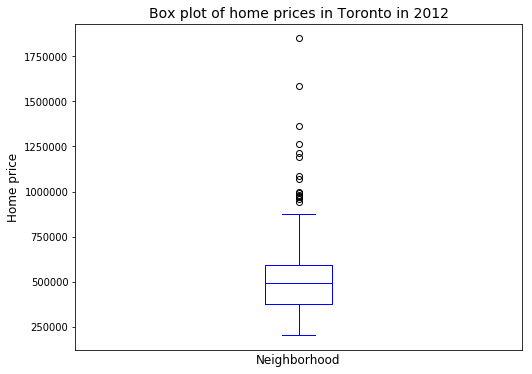

In [111]:
import matplotlib.pyplot as plt
housing_2012.plot(kind='box', figsize= (8, 6), color= 'b')
plt.title('Box plot of home prices in Toronto in 2012', fontsize= 14)
plt.xlabel('Neighborhood', fontsize= 12)
plt.ylabel('Home price', fontsize= 12)
plt.xticks([])
plt.show()

## Import neighborhoods geospatial data

In [112]:
# The code was removed by Watson Studio for sharing.

In [113]:
from ibm_botocore.client import Config
import ibm_boto3
cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])

In [114]:
cos.download_file(Bucket=credentials['BUCKET'],Key='Neighbourhoods.json',Filename='Neighbourhoods1.json')

In [115]:
toronto_geo= 'Neighbourhoods1.json'

## Choropleth map of neighborhoods' home prices

In [121]:

map_housing= folium.Map(location= [latitude, longitude], zoom_start= 11)


map_housing.choropleth(
    geo_data= toronto_geo,
    data=housing_2012,
    columns=['Neighborhood', 'Home Prices'],
    key_on='feature.properties.AREA_NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Toronto housing prices')



for lat, lng, label, price in zip(df['Latitude'], df['Longitude'], df['Neighborhood'], df['Home Prices']):
    label = folium.Popup(str(label) + ' ' + str(price)+ ' $', parse_html=True)
    folium.features.CircleMarker(
            [lat, lng],
            radius= 2,
            color= 'black',
            fill= True,
            popup= label,
            fill_color='blue',
            fill_opacity=0.6,
            ).add_to(map_housing)

map_housing

# Crimes rate

In [122]:
body = client_5aec89614c924d8ca34a71a2f6027ab8.get_object(Bucket='capstoneproject-donotdelete-pr-lsw2wjd8voye5q',Key='MCI_2014_to_2018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

crime_df = pd.read_csv(body)
crime_df.head()


X          Y  Index_ event_unique_id            occurrencedate  \
0 -79.343094  43.668449     214  GO-20141948968  2014-04-24T11:29:00.000Z   
1 -79.507927  43.759285     215  GO-20141950728  2014-04-24T13:00:00.000Z   
2 -79.501663  43.697552     216  GO-20141956416  2014-04-25T13:20:00.000Z   
3 -79.571510  43.721703     217  GO-20141956867  2014-04-24T17:00:00.000Z   
4 -79.503487  43.663891     218  GO-20141957505  2014-04-25T16:00:00.000Z   

               reporteddate premisetype  ucr_code  ucr_ext            offence  \
0  2014-04-24T12:46:00.000Z  Commercial      1610      200  Robbery - Mugging   
1  2014-04-24T15:58:00.000Z       House      2120      200                B&E   
2  2014-04-25T13:52:00.000Z   Apartment      1430      100            Assault   
3  2014-04-25T10:30:00.000Z     Outside      1430      100            Assault   
4  2014-04-25T16:15:00.000Z   Apartment      1430      100            Assault   

   ...  occurrencedayofyear occurrencedayofweek  occurrencehour  \
0  ...                114.0          Thursday                11   
1  ...                114.0          Thursday                13   
2  ...                115.0          Friday                  13   
3  ...                114.0          Thursday                17   
4  ...                115.0          Friday                  16   

               MCI Division  Hood_ID             Neighbourhood        Lat  \
0          Robbery      D55       68      North Riverdale (68)  43.668449   
1  Break and Enter      D31       24          Black Creek (24)  43.759285   
2          Assault      D12       30  Brookhaven-Amesbury (30)  43.697552   
3          Assault      D23        4       Rexdale-Kipling (4)  43.721703   
4          Assault      D11      114  Lambton Baby Point (114)  43.663891   

        Long  ObjectId  
0 -79.343094         1  
1 -79.507927         2  
2 -79.501663         3  
3 -79.571510         4  
4 -79.503487         5  

[5 rows x 29 columns]

In [123]:
crime_df.shape

(167525, 29)

### Restrain the dataset to the data pertaining to the year 2018:

In [124]:
crime_2018= crime_df[crime_df['occurrencedate'].str.startswith('2018')]

In [125]:
print(crime_2018.shape)
crime_2018.head()

(35382, 29)


X          Y  Index_ event_unique_id            occurrencedate  \
8009 -79.375877  43.654957   16259    GO-201881815  2018-01-14T01:12:00.000Z   
8010 -79.437920  43.640335   16260   GO-2018129259  2018-01-21T13:18:00.000Z   
8011 -79.232048  43.802563   16261   GO-2018134696  2018-01-21T15:00:00.000Z   
8012 -79.288361  43.691235   16262   GO-2018178024  2018-01-29T00:59:00.000Z   
8013 -79.288361  43.691235   16263   GO-2018178024  2018-01-29T00:59:00.000Z   

                  reporteddate premisetype  ucr_code  ucr_ext  \
8009  2018-01-14T01:12:00.000Z     Outside      1420      100   
8010  2018-01-21T13:25:00.000Z  Commercial      1610      210   
8011  2018-01-22T11:21:00.000Z       House      2120      200   
8012  2018-01-29T00:59:00.000Z  Commercial      2120      200   
8013  2018-01-29T00:59:00.000Z  Commercial      1420      100   

                  offence  ...  occurrencedayofyear occurrencedayofweek  \
8009  Assault With Weapon  ...                 14.0          Sunday       
8010   Robbery - Business  ...                 21.0          Sunday       
8011                  B&E  ...                 21.0          Sunday       
8012                  B&E  ...                 29.0          Monday       
8013  Assault With Weapon  ...                 29.0          Monday       

      occurrencehour              MCI Division  Hood_ID  \
8009               1          Assault      D51       75   
8010              13          Robbery      D11       86   
8011              15  Break and Enter      D42      132   
8012               0  Break and Enter      D55      121   
8013               0          Assault      D55      121   

                   Neighbourhood        Lat       Long  ObjectId  
8009  Church-Yonge Corridor (75)  43.654957 -79.375877     15010  
8010           Roncesvalles (86)  43.640335 -79.437920     15011  
8011               Malvern (132)  43.802563 -79.232048     15012  
8012              Oakridge (121)  43.691235 -79.288361     15013  
8013              Oakridge (121)  43.691235 -79.288361     15014  

[5 rows x 29 columns]

In [126]:
eringate= crime_2018[crime_2018['Neighbourhood'].str.contains('Eringate')]

In [127]:
# 'Eringate-Centennial_West Deane (11)' written in 2 ways, let's rectify this:
crime_2018['Neighbourhood'].replace(to_replace='Eringate-Centennial_West Deane (11)', value= 'Eringate-Centennial-West Deane (11)', inplace= True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [128]:
eringate['Neighbourhood'].unique()

array(['Eringate-Centennial-West Deane (11)',
       'Eringate-Centennial_West Deane (11)'], dtype=object)

In [129]:
# We group all row by neighborhood to get number of crimes:
crime_2018= crime_2018[['Neighbourhood', 'event_unique_id']].groupby('Neighbourhood').count().sort_values('event_unique_id', ascending=False)

In [130]:
crime_2018.reset_index(level=0, inplace= True)

In [131]:
# Rename the columns:
crime_2018.columns= ['Neighborhood', 'Crimes']

In [132]:
print(crime_2018.shape)
crime_2018.head()

(140, 2)


Neighborhood  Crimes
0              Church-Yonge Corridor (75)    1552
1  Waterfront Communities-The Island (77)    1266
2              West Humber-Clairville (1)    1035
3                          Moss Park (73)     914
4               Kensington-Chinatown (78)     815

In [133]:
# We check that we have the same number of neighborhoods(140):
len(crime_2018['Neighborhood'].unique())

140

Box plot of crimes rate

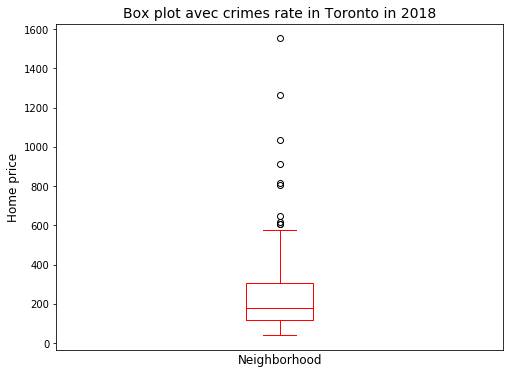

In [134]:
import matplotlib.pyplot as plt
crime_2018.plot(kind='box', figsize= (8, 6), color= 'r')
plt.title('Box plot avec crimes rate in Toronto in 2018', fontsize= 14)
plt.xlabel('Neighborhood', fontsize= 12)
plt.ylabel('Home price', fontsize= 12)
plt.xticks([])
plt.show()

In [135]:
# We merge crimes data to our previous dataset:
features_corr= df.merge(crime_2018, on='Neighborhood')

In [136]:
print(features_corr.shape)
features_corr.head()

(140, 5)


Neighborhood   Latitude  Longitude  Home Prices  \
0               Agincourt North (129)  43.805441 -79.266712       375307   
1  Agincourt South-Malvern West (128)  43.788658 -79.265612       332710   
2                      Alderwood (20)  43.604937 -79.541611       504233   
3                          Annex (95)  43.671585 -79.404001       993491   
4              Banbury-Don Mills (42)  43.737657 -79.349718       613647   

   Crimes  
0     246  
1     275  
2      90  
3     615  
4     196

Let's see the relationship between home prices and crime rate variables:

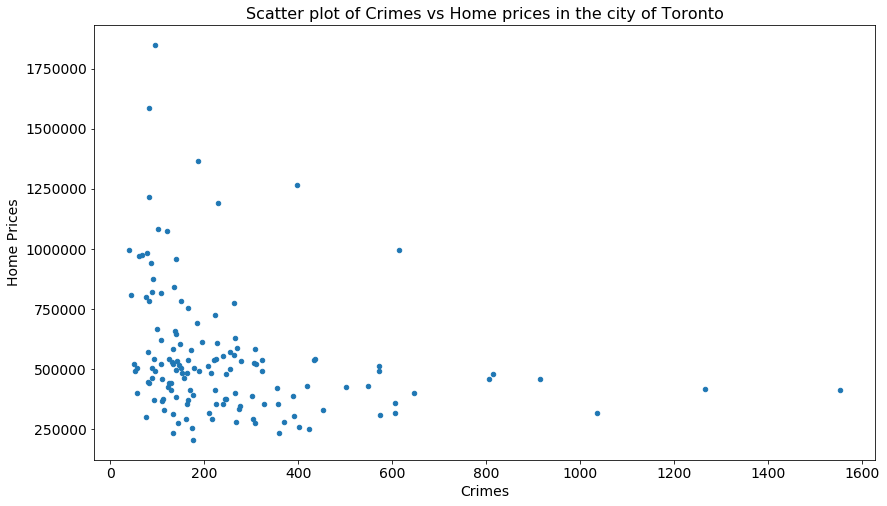

In [137]:
features_corr.plot(kind= 'scatter', x='Crimes', y= 'Home Prices', figsize=(14,8))

plt.title('Scatter plot of Crimes vs Home prices in the city of Toronto', fontsize= 16)
plt.xlabel('Crimes', fontsize= 14)
plt.ylabel('Home Prices', fontsize= 14)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.show()

## Choropleth map of neighborhoods' crimes rate

In [139]:
map_crime= folium.Map(location= [latitude, longitude], zoom_start= 11)


map_crime.choropleth(
    geo_data= toronto_geo,
    data=crime_2018,
    columns=['Neighborhood', 'Crimes'],
    key_on='feature.properties.AREA_NAME',
    fill_color='YlOrRd', 
    fill_opacity=1, 
    line_opacity=0.2,
    legend_name='Toronto crime rate')

for lat, lng, label, crime in zip(features_corr['Latitude'], features_corr['Longitude'], features_corr['Neighborhood'], features_corr['Crimes']):
    label = folium.Popup(str(label) +  ' ' + str(crime) + ' crimes', parse_html=True)
    folium.features.CircleMarker(
            [lat, lng],
            radius= 2,
            color= 'black',
            fill= True,
            popup= label,
            fill_color='blue',
            fill_opacity=0.6,
            ).add_to(map_crime)

map_crime